<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


Chosen test: **Math for 8 grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [8]:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [10]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **TOTAL_REVENUE,ENROLL_8,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,YEAR**

Feature selection justification: **These are all characters directly related to the year's expenditure**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'Frequency')

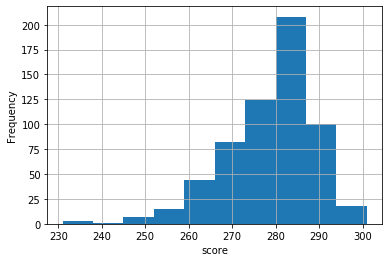

In [13]:
# note - this test is scored out of 500 according to the NAEP website
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')

**Distribution of 8th grade math scores**

Visualization 2

Text(0.5, 1.0, '8th grade math score over time')

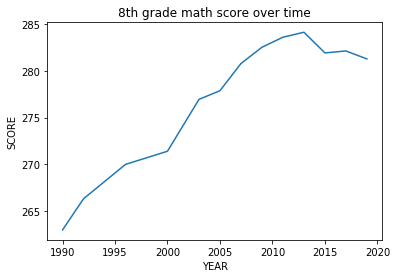

In [12]:
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time')

**8th grade math score over time**

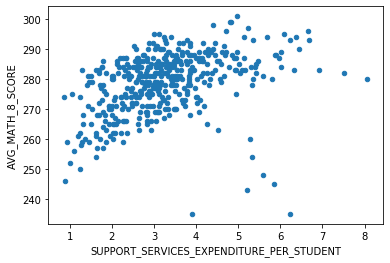

In [52]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')

**comparison between 8th grade math and SUPPORT_SERVICE_EXPENDITURE_PER_STUDENT**

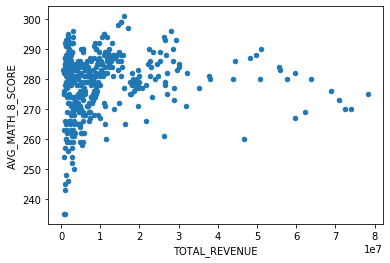

In [53]:
df.plot.scatter(x='TOTAL_REVENUE',y='AVG_MATH_8_SCORE')

**comparison between 8th grade math and TOTAL_REVENUE**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['TOTAL_REVENUE','ENROLL_8','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=3, random_state=0)

In [41]:
y.mean()

278.6765375854214

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [23]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [34]:
# create your model here
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
model.score(X_test, y_test)

0.23053866585303817

Text(0, 0.5, 'Math 8 score')

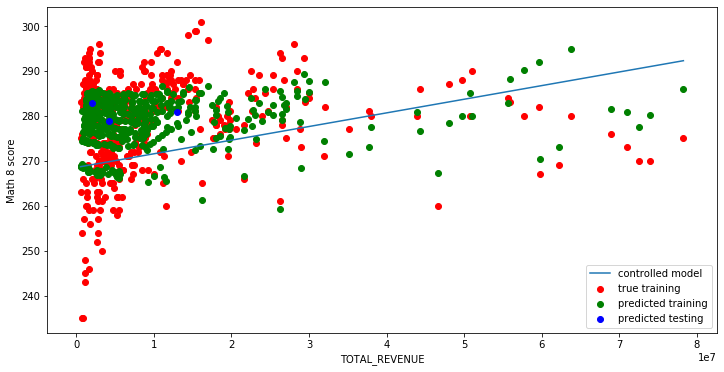

In [39]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

**classification**

In [42]:
y = df.loc[X.index]['AVG_READING_8_SCORE']>260

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model = KNeighborsClassifier(n_neighbors=3)

In [46]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

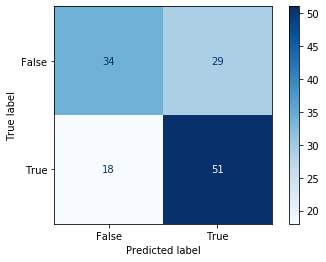

In [47]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [49]:
# accuracy score
accuracy_score(y_test, model.predict(X_test))

0.6439393939393939

In [50]:
# recall / sensitivity
recall_score(y_test, model.predict(X_test))

0.7391304347826086

In [51]:
# precision / specificity
precision_score(y_test, model.predict(X_test))

0.6375

<h2> Summary </h2>

It looks into math for 8 grade by first cleaning up data to get rid of NAN values which have no meaning. After analysing the data, it is found that there is some relationship between 'TOTAL_REVENUE','ENROLL_8','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR' and average math score for 8 grade. The data is split into two parts, one for training model, and another one for testing. Then linear regression is applied. It is found that the result on test data is close to predicted ones, proving our model to be useful.  